# General Brutality Analysis
## Logan Chang and Robert Yu
## 07/23/20

In this notebook, we begin to define police brutality and observe some trends within incidents reporting brutality as we define it. 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.options.mode.chained_assignment = None 
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

    

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cpd-trr-data-20042016/trr.csv
/kaggle/input/cpd-trr-data-20042016/event_id.csv
/kaggle/input/cpd-trr-data-20042016/trr_just_injuries.csv
/kaggle/input/cpd-trr-data-20042016/beatlist.txt


In [2]:
df_trr = pd.read_csv('/kaggle/input/cpd-trr-data-20042016/trr.csv')
df_trr_injuries = pd.read_csv('/kaggle/input/cpd-trr-data-20042016/trr_just_injuries.csv')

In [3]:
df_trr.columns

Index(['trr_id', 'sr_no', 'se_no', 'beat', 'party_fired_first', 'taser',
       'firearm_used', 'trr_year', 'weapon_discharge_yn', 'list_of_subcats',
       'list_of_cats', 'number_of_member_actions', 'number_of_subject_actions',
       'highest_resistance_level', 'list_of_subject_actions',
       'subject_pulled_away', 'subject_disobey_verbal', 'subject_stiffened',
       'subject_fled', 'subject_attack_no_weapon', 'subject_battery_threat',
       'subject_had_weapon', 'subject_attack_with_weapon',
       'subject_deadly_force', 'subject_other', 'subject_armed', 'injured',
       'alleged_injury', 'subject_no', 'event_id', 'race'],
      dtype='object')

In [4]:
#definitions of police brutality
# -police force was used at all
# -injuries occured
# -police action was at a degree that exceeded the level of resistance (up for speculation) regardless of outcome to subject


**First definition of police brutality:**

Police force was used at all

*NOTE: We will label this as a binary column called 'pb_1' where a value of 1 denotes police force was used and 0 denotes no police force*

In [5]:
df_trr['pb_1'] = df_trr.list_of_cats.apply(lambda x: 0 if pd.isna(x) else 1)

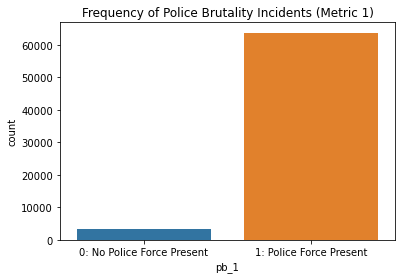

In [6]:
#print(df_trr.pb_1.value_counts())
sns.countplot(x="pb_1", data=df_trr)
plt.title('Frequency of Police Brutality Incidents (Metric 1)')
plt.xticks([0,1],['0: No Police Force Present', '1: Police Force Present'])
plt.show()

**First definition of police brutality:**

Injuries Occured

*NOTE: We will label this as a binary column called 'pb_2' where a value of 1 denotes police force was used and 0 denotes no police force*

In [7]:
df_trr['pb_2'] = df_trr.apply(lambda row: 1 if (row['alleged_injury']==1 or row['injured']==1) else 0, axis = 1)

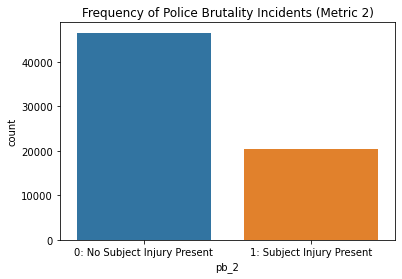

In [8]:
#print(df_trr.pb_2.value_counts())
sns.countplot(x="pb_2", data=df_trr)
plt.title('Frequency of Police Brutality Incidents (Metric 2)')
plt.xticks([0,1],['0: No Subject Injury Present', '1: Subject Injury Present'])
plt.show()

**Third Definition for Police Brutality**

Brutality = True if Highest Subject Resistance Level+2<=Highest Officer Action Category Level

*NOTE: We will leave out Officer Actions in the 'Other Force' category as some of these actions are 'violent' (i.e. 'Knee on Neck') while others are more 'docile'(i.e. 'Backed Away and Gave Verbal Warning')*

*NOTE: We will label this as a binary column called 'pb_3' where a value of 1 denotes police force was used and 0 denotes no police force*

In [9]:
df_trr.list_of_cats.head(20)

0                 4.0,
1                 4.0,
2             4.0,4.0,
3                 4.0,
4             4.0,3.0,
5         3.0,3.0,3.0,
6                 3.0,
7                 3.0,
8             4.0,3.0,
9                 3.0,
10                 NaN
11    4.0,3.0,3.0,3.0,
12                4.0,
13                4.0,
14        3.0,3.0,3.0,
15        4.0,3.0,3.0,
16                4.0,
17                4.0,
18                4.0,
19                4.0,
Name: list_of_cats, dtype: object

In [10]:
df_trr.list_of_cats.fillna(0.0, inplace = True)
df_trr['max_officer_action'] = df_trr.list_of_cats.apply(lambda x: float(max(x.split(',')[:-1])) if type(x) != float else 0.0)

In [11]:
df_trr['pb_3'] = 0
df_trr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67019 entries, 0 to 67018
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   trr_id                      67019 non-null  int64  
 1   sr_no                       67003 non-null  float64
 2   se_no                       67015 non-null  float64
 3   beat                        67019 non-null  int64  
 4   party_fired_first           5741 non-null   object 
 5   taser                       67019 non-null  int64  
 6   firearm_used                67019 non-null  int64  
 7   trr_year                    67019 non-null  int64  
 8   weapon_discharge_yn         67019 non-null  int64  
 9   list_of_subcats             63714 non-null  object 
 10  list_of_cats                67019 non-null  object 
 11  number_of_member_actions    63714 non-null  float64
 12  number_of_subject_actions   66970 non-null  float64
 13  highest_resistance_level    670

In [12]:
df_trr.assign(pb_3 = 0)
for ind in df_trr.index:
    subject_resistance = df_trr['highest_resistance_level'][ind]
    officer_action = df_trr['max_officer_action'][ind]
    if officer_action == 2.0:
        continue
    if officer_action >= (subject_resistance+2) or officer_action == 6.0:
        df_trr['pb_3'][ind] = 1

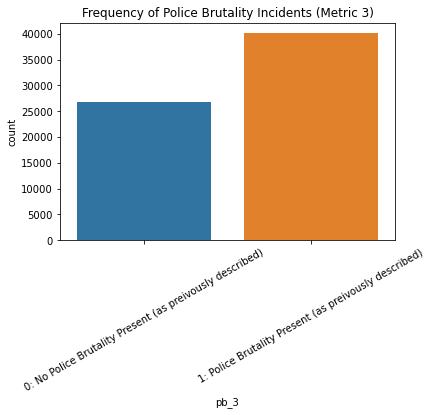

In [13]:
#print(df_trr.pb_3.value_counts())
sns.countplot(x="pb_3", data=df_trr)
plt.title('Frequency of Police Brutality Incidents (Metric 3)')
plt.xticks([0,1],['0: No Police Brutality Present (as preivously described)', '1: Police Brutality Present (as preivously described)'], rotation = '30')
plt.show()

In [14]:
print(len(df_trr.loc[(df_trr.pb_1 == 1) & (df_trr.pb_2 == 1) & (df_trr.pb_3 == 1)]))
print(len(df_trr))

12162
67019


We will define incidents of police brutality as TRR's where all three metrics of 'police brutality' that we defined are present.

Now, we will create a DataFrame where we isolate such incidents:

In [15]:
df_pb = df_trr.loc[(df_trr.pb_1 == 1) & (df_trr.pb_2 == 1) & (df_trr.pb_3 == 1)]
df_pb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12162 entries, 0 to 67009
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   trr_id                      12162 non-null  int64  
 1   sr_no                       12160 non-null  float64
 2   se_no                       12162 non-null  float64
 3   beat                        12162 non-null  int64  
 4   party_fired_first           1808 non-null   object 
 5   taser                       12162 non-null  int64  
 6   firearm_used                12162 non-null  int64  
 7   trr_year                    12162 non-null  int64  
 8   weapon_discharge_yn         12162 non-null  int64  
 9   list_of_subcats             12162 non-null  object 
 10  list_of_cats                12162 non-null  object 
 11  number_of_member_actions    12162 non-null  float64
 12  number_of_subject_actions   12157 non-null  float64
 13  highest_resistance_level    121

Comparing agrreagate data for each police brutality metric:

First, race:

In [16]:
print('TOTAL RACE BREAKDOWN ACROSS ALL TRR INCIDENTS\n')
for race in df_trr.race.value_counts().index:
    print(race, end = ': ')
    print(str(df_trr.race.value_counts()[race]/len(df_trr.race)*100)+'%')

TOTAL RACE BREAKDOWN ACROSS ALL TRR INCIDENTS

BLACK: 74.20731434369358%
HISPANIC: 13.990062519583999%
WHITE: 9.750966143929334%
OTHER: 1.3294737313299214%
ASIAN/PACIFIC ISLANDER: 0.6416090959280204%
NATIVE AMERICAN/ALASKAN NATIVE: 0.08057416553514675%


In [17]:
df_temp = df_trr.loc[df_trr.pb_1==1]
print('TOTAL RACE BREAKDOWN ACROSS ALL TRR INCIDENTS WHERE METRIC 1 PRESENT\n')
for race in df_temp.race.value_counts().index:
    print(race, end = ': ')
    print(str(df_temp.race.value_counts()[race]/len(df_temp.race)*100)+'%')

TOTAL RACE BREAKDOWN ACROSS ALL TRR INCIDENTS WHERE METRIC 1 PRESENT

BLACK: 74.40593904008537%
HISPANIC: 13.871362651850458%
WHITE: 9.680760900273096%
OTHER: 1.3215305898232728%
ASIAN/PACIFIC ISLANDER: 0.6387921022067364%
NATIVE AMERICAN/ALASKAN NATIVE: 0.08161471576105722%


In [18]:
df_temp = df_trr.loc[df_trr.pb_2==1]
print('TOTAL RACE BREAKDOWN ACROSS ALL TRR INCIDENTS WHERE METRIC 2 PRESENT\n')
for race in df_temp.race.value_counts().index:
    print(race, end = ': ')
    print(str(df_temp.race.value_counts()[race]/len(df_temp.race)*100)+'%')

TOTAL RACE BREAKDOWN ACROSS ALL TRR INCIDENTS WHERE METRIC 2 PRESENT

BLACK: 69.60659898477158%
HISPANIC: 17.058766106989456%
WHITE: 11.289535337758688%
OTHER: 1.3373682155408044%
ASIAN/PACIFIC ISLANDER: 0.6589222959781336%
NATIVE AMERICAN/ALASKAN NATIVE: 0.04880905896134322%


In [19]:
df_temp = df_trr.loc[df_trr.pb_3==1]
print('TOTAL RACE BREAKDOWN ACROSS ALL TRR INCIDENTS WHERE METRIC 3 PRESENT\n')
for race in df_temp.race.value_counts().index:
    print(race, end = ': ')
    print(str(df_temp.race.value_counts()[race]/len(df_temp.race)*100)+'%')

TOTAL RACE BREAKDOWN ACROSS ALL TRR INCIDENTS WHERE METRIC 3 PRESENT

BLACK: 75.34198789026487%
HISPANIC: 13.477686691749932%
WHITE: 9.06485934268557%
OTHER: 1.3405426955373383%
ASIAN/PACIFIC ISLANDER: 0.695188498243341%
NATIVE AMERICAN/ALASKAN NATIVE: 0.07973488151894949%


Looking at the frequency of 'police brutality' in each beat:

In [20]:
df_pb.beat.value_counts()

1134    158
1533    137
621     131
1112    124
624     124
       ... 
1214      3
1654      3
1934      3
121       3
235       1
Name: beat, Length: 300, dtype: int64

Looking at the frequency of 'police brutality' per each race:

In [21]:
df_pb.race.value_counts()

BLACK                             8531
HISPANIC                          2076
WHITE                             1282
OTHER                              168
ASIAN/PACIFIC ISLANDER              99
NATIVE AMERICAN/ALASKAN NATIVE       6
Name: race, dtype: int64

In [22]:
df_pb = df_pb.loc[df_trr.pb_3==1]
print('TOTAL RACE BREAKDOWN ACROSS ALL TRR INCIDENTS WHERE ALL METRICS PRESENT\n')
for race in df_pb.race.value_counts().index:
    print(race, end = ': ')
    print(str(df_pb.race.value_counts()[race]/len(df_pb.race)*100)+'%')

TOTAL RACE BREAKDOWN ACROSS ALL TRR INCIDENTS WHERE ALL METRICS PRESENT

BLACK: 70.14471304061833%
HISPANIC: 17.06956092747903%
WHITE: 10.541029435948035%
OTHER: 1.3813517513566849%
ASIAN/PACIFIC ISLANDER: 0.8140108534780464%
NATIVE AMERICAN/ALASKAN NATIVE: 0.049333991119881605%


Looking at the frequency of 'police brutality' per highest subject resistance level:

In [23]:
df_pb.highest_resistance_level.value_counts()

1.0    8302
2.0    1970
3.0    1109
5.0     663
0.0     118
Name: highest_resistance_level, dtype: int64

Looking at the frequency of 'police brutality' per highest category of officer action:

In [24]:
df_pb.max_officer_action.value_counts()

4.0    8388
5.0    2384
3.0     727
6.0     663
Name: max_officer_action, dtype: int64

Looking at breakdown of resistors by beat:

Counting the number of Incidnets that are exlcusive to each respective metric and not included in the intersection of all three metrics (our definition of police brutality is the intersction of all 3 metrics):

In [25]:
print('NUMBER OF TRR INCIDENTS EXCLUSIVE TO METRIC 1\n')
df_temp = df_trr.loc[df_trr.pb_1 == 1]
uncommon = 0
combinedID = list(df_pb.trr_id)
for beat in df_temp.trr_id:
    if beat not in combinedID:
        uncommon+=1
print('Number of Incidents exclusive to Metric 1: '+str(uncommon))
print('Number of Total Incidents in Metric 1: '+str(len(df_temp)))
print('Percentage Exclusive to Metric 1: ' +str(uncommon/len(df_temp)*100)+'%')

NUMBER OF TRR INCIDENTS EXCLUSIVE TO METRIC 1

Number of Incidents exclusive to Metric 1: 51552
Number of Total Incidents in Metric 1: 63714
Percentage Exclusive to Metric 1: 80.91157359450042%


In [26]:
print('NUMBER OF TRR INCIDENTS EXCLUSIVE TO METRIC 2\n')
df_temp = df_trr.loc[df_trr.pb_2 == 1]
uncommon = 0
combinedID = list(df_pb.trr_id)
for beat in df_temp.trr_id:
    if beat not in combinedID:
        uncommon+=1
print('Number of Incidents exclusive to Metric 2: '+str(uncommon))
print('Number of Total Incidents in Metric 2: '+str(len(df_temp)))
print('Percentage Exclusive to Metric 2: ' +str(uncommon/len(df_temp)*100)+'%')

NUMBER OF TRR INCIDENTS EXCLUSIVE TO METRIC 2

Number of Incidents exclusive to Metric 2: 8326
Number of Total Incidents in Metric 2: 20488
Percentage Exclusive to Metric 2: 40.63842249121437%


In [27]:
print('NUMBER OF TRR INCIDENTS EXCLUSIVE TO METRIC 3\n')
df_temp = df_trr.loc[df_trr.pb_3 == 1]
uncommon = 0
combinedID = list(df_pb.trr_id)
for beat in df_temp.trr_id:
    if beat not in combinedID:
        uncommon+=1
print('Number of Incidents exclusive to Metric 3: '+str(uncommon))
print('Number of Total Incidents in Metric 3: '+str(len(df_temp)))
print('Percentage Exclusive to Metric 3: ' +str(uncommon/len(df_temp)*100)+'%')

NUMBER OF TRR INCIDENTS EXCLUSIVE TO METRIC 3

Number of Incidents exclusive to Metric 3: 27971
Number of Total Incidents in Metric 3: 40133
Percentage Exclusive to Metric 3: 69.69576159270426%


In [28]:
#download what this dataframe as the final CSV with trr incidents including brutality metrics
df_trr.columns
df_trr.to_csv('TRR_FINAL_WITH_PB.csv', index = False)

## Collecting relevant TRR data by beat on all TRR's:

*I apologize for what is next. As a reader, you can totally skip these next code cells as all I'm doing is creating a new CSV with police brutality stats by beat. The code is repetitive and a hot mess. As it adds no immediate value to our analysis, I will comment the following code out.*

In [29]:
# #import json
# f = open('/kaggle/input/cpd-trr-data-20042016/beatlist.txt', 'r')
# #out = open ('resistance_levels_by_beat.txt', 'w')
# formatted_dict = {}
# totBeats = int(f.readline())
# for i in range (0,totBeats):
#     beat = int(f.readline())
#     df_beat = df_trr.loc[df_trr.beat == beat]
#     #print('Beat: '+str(beat))
#     #out.write(str(beat)+'\n')
#     numFired = df_beat.loc[df_beat.firearm_used == 1]
#     formatted_dict[beat] = len(numFired) 
#     #out.write(json.dumps(formatted_dict))
#     #out.write('\n')
# #print(formatted_dict)

In [30]:
# df_trr_beat = pd.DataFrame.from_dict(formatted_dict, orient = 'index')
# df_trr_beat.rename(columns={0: "num_incidents_firearm"}, inplace = True)
# #df_trr_beat.head()

In [31]:
# import json
# f = open('/kaggle/input/cpd-trr-data-20042016/beatlist.txt', 'r')
# resistance_levels = ['Passive Resistor', 'Active Resistor', 'Assailant Assault', 'Assailant Assault/Battery', 'Assailant Battery', 'Assailant Deadly Force']
# out = open ('resistance_levels_by_beat.txt', 'w')
# totBeats = int(f.readline())
# final_dict = {}
# for i in range (0,totBeats):
#     beat = int(f.readline())
#     df_beat = df_trr.loc[df_trr.beat == beat]
#     #print(beat)
#     out.write(str(beat)+'\n')
#     freq_dict = (df_beat.highest_resistance_level.value_counts().to_dict())
#     formatted_dict = {}
#     for resistance in resistance_levels:
#         ind = float(resistance_levels.index(resistance))
#         try:
#             formatted_dict[resistance] = freq_dict[ind]
#         except KeyError:
#             formatted_dict[resistance] = 0
#     #print(formatted_dict)
#     final_dict[beat] = formatted_dict
#     out.write(json.dumps(formatted_dict))
#     out.write('\n')
#     #print()
# #print(final_dict)

In [32]:
# beats = list(final_dict.keys())
# df = pd.DataFrame(beats)
# df.rename(columns={0: "beat"}, inplace = True)
# df.set_index('beat', inplace = True)
# for resistance in resistance_levels:
#     cat_name = resistance.replace(' ','_')
#     cat_name = 'num_{}'.format(cat_name.lower())
#     df[cat_name] = 0
# for beat in final_dict.keys():
#     for category in final_dict[beat]:
#         cat_name = category.replace(' ','_')
#         cat_name = 'num_{}'.format(cat_name.lower())
#         df[cat_name][beat] = final_dict[beat][category]
# df_trr_beat = pd.concat([df_trr_beat, df], axis=1)
# #df_trr_beat.head()

In [33]:
# #import json
# f = open('/kaggle/input/cpd-trr-data-20042016/beatlist.txt', 'r')
# raceList = ['HISPANIC', 'BLACK', 'ASIAN/PACIFIC ISLANDER', 'WHITE', 'OTHER','NATIVE AMERICAN/ALASKAN NATIVE']
# #out = open ('resistance_levels_by_beat.txt', 'w')
# totBeats = int(f.readline())
# final_dict = {}
# for i in range (0,totBeats):
#     beat = int(f.readline())
#     df_beat = df_trr.loc[df_trr.beat == beat]
#     #print(beat)
#     #out.write(str(beat)+'\n')
#     freq_dict = (df_beat.race.value_counts().to_dict())
#     formatted_dict = {}
#     for race in raceList:
#         try:
#             formatted_dict[race] = freq_dict[race]
#         except KeyError:
#             formatted_dict[race] = 0
#     #print(formatted_dict)
#     #out.write(json.dumps(formatted_dict))
#     #out.write('\n')
#     #print()
#     final_dict[beat] = formatted_dict
# #print(final_dict)

In [34]:
# beats = list(final_dict.keys())
# df = pd.DataFrame(beats)
# df.rename(columns={0: "beat"}, inplace = True)
# df.set_index('beat', inplace = True)
# for race in raceList:
#     cat_name = race.replace(' ','_')
#     cat_name = 'num_{}'.format(cat_name.lower())
#     df[cat_name] = 0
# for beat in final_dict.keys():
#     for category in final_dict[beat]:
#         cat_name = category.replace(' ','_')
#         cat_name = 'num_{}'.format(cat_name.lower())
#         df[cat_name][beat] = final_dict[beat][category]
# df_trr_beat = pd.concat([df_trr_beat, df], axis=1)
# df_trr_beat.rename(columns = {'num_asian/pacific_islander': 'num_asian', 'num_native_american/alaskan_native': 'num_native'}, inplace = True)
# #df_trr_beat.head()

In [35]:
# #import json
# f = open('/kaggle/input/cpd-trr-data-20042016/beatlist.txt', 'r')
# partyList = ['MEMBER', 'OTHER', 'OFFENDER']
# #out = open ('resistance_levels_by_beat.txt', 'w')
# final_dict = {}
# totBeats = int(f.readline())
# for i in range (0,totBeats):
#     beat = int(f.readline())
#     df_beat = df_trr.loc[df_trr.beat == beat]
#     #print('PARTY FIRED FIRST IN BEAT '+str(beat))
#     #out.write(str(beat)+'\n')
#     freq_dict = (df_beat.party_fired_first.value_counts().to_dict())
#     formatted_dict = {}
#     for race in partyList:
#         try:
#             formatted_dict[race] = freq_dict[race]
#         except KeyError:
#             formatted_dict[race] = 0
#     #print(formatted_dict)
#     #out.write(json.dumps(formatted_dict))
#     #out.write('\n')
#     #print()
#     final_dict[beat] = formatted_dict
# #print(final_dict)

In [36]:
# beats = list(final_dict.keys())
# df = pd.DataFrame(beats)
# df.rename(columns={0: "beat"}, inplace = True)
# df.set_index('beat', inplace = True)
# for party in partyList:
#     cat_name = party.replace(' ','_')
#     cat_name = 'num_{}_fired_first'.format(cat_name.lower())
#     df[cat_name] = 0
# for beat in final_dict.keys():
#     for category in final_dict[beat]:
#         cat_name = category.replace(' ','_')
#         cat_name = 'num_{}_fired_first'.format(cat_name.lower())
#         df[cat_name][beat] = final_dict[beat][category]
# df_trr_beat = pd.concat([df_trr_beat, df], axis=1)
# #df_trr_beat.head()

In [37]:
# #import json
# f = open('/kaggle/input/cpd-trr-data-20042016/beatlist.txt', 'r')
# officer_actions = ['','','OTHER FORCE', 'PHYSICAL FORCE-HOLDING, TASER DISPLAY', 'PHYSICAL FORCE-STUNNING, CHEMICAL', 'IMPACT WEAPON, TASER, PHYSICAL FORCE-DIRECT MECHANICAL,', 'FIREARM']
# #out = open ('resistance_levels_by_beat.txt', 'w')
# totBeats = int(f.readline())
# final_dict = {}
# for i in range (0,totBeats):
#     beat = int(f.readline())
#     df_beat = df_trr.loc[df_trr.beat == beat]
#     #print(beat)
#     #out.write(str(beat)+'\n')
#     freq_dict = (df_beat.max_officer_action.value_counts().to_dict())
#     formatted_dict = {}
#     for resistance in officer_actions[2:]:
#         ind = float(officer_actions.index(resistance))
#         try:
#             formatted_dict[resistance] = freq_dict[ind]
#         except KeyError:
#             formatted_dict[resistance] = 0
#     #print(formatted_dict)
#     #out.write(json.dumps(formatted_dict))
#     #out.write('\n')
#     #print()
#     final_dict[beat] = formatted_dict
# #print(final_dict)

In [38]:
# beats = list(final_dict.keys())
# df = pd.DataFrame(beats)
# df.rename(columns={0: "beat"}, inplace = True)
# df.set_index('beat', inplace = True)
# for action in officer_actions[2:]:
#     cat_name = action.replace(', ','/').replace(' ','_')
#     cat_name = 'num_{}'.format(cat_name.lower())
#     df[cat_name] = 0
# for beat in list(final_dict.keys()):
#     for category in final_dict[beat]:
#         cat_name = category.replace(', ','/').replace(' ','_')
#         cat_name = 'num_{}'.format(cat_name.lower())
#         df[cat_name][beat] = final_dict[beat][category]
# df_trr_beat = pd.concat([df_trr_beat, df], axis=1)
# #df_trr_beat.head()

In [39]:
# #import json
# f = open('/kaggle/input/cpd-trr-data-20042016/beatlist.txt', 'r')
# #out = open ('resistance_levels_by_beat.txt', 'w')
# totBeats = int(f.readline())
# formatted_dict = {}
# for i in range (0,totBeats):
#     beat = int(f.readline())
#     df_beat = df_trr.loc[df_trr.beat == beat]
#     #print('Beat: '+str(beat))
#     #out.write(str(beat)+'\n')
#     numInjured = df_beat.loc[(df_beat.injured == 1) | (df_beat.alleged_injury == 1)]
#     formatted_dict[beat] = len(numInjured) 
#     #out.write(json.dumps(formatted_dict))
#     #out.write('\n')
# #print(formatted_dict)

In [40]:
# df = pd.DataFrame.from_dict(formatted_dict, orient = 'index')
# df.rename(columns={0: "num_incidents_injury"}, inplace = True)
# df_trr_beat = pd.concat([df_trr_beat, df], axis=1)
# #df_trr_beat.head()

In [41]:
# #import json
# f = open('/kaggle/input/cpd-trr-data-20042016/beatlist.txt', 'r')
# #out = open ('resistance_levels_by_beat.txt', 'w')
# formatted_dict = {}
# totBeats = int(f.readline())
# for i in range (0,totBeats):
#     beat = int(f.readline())
#     df_beat = df_trr.loc[df_trr.beat == beat]
#     #print('Beat: '+str(beat))
#     #out.write(str(beat)+'\n')
#     numPB_1 = df_beat.loc[(df_beat.pb_1 == 1)]
#     formatted_dict[beat] = len(numPB_1) 
#     #out.write(json.dumps(formatted_dict))
#     #out.write('\n')
# #print(formatted_dict)

In [42]:
# df = pd.DataFrame.from_dict(formatted_dict, orient = 'index')
# df.rename(columns={0: "num_incidents_pb_1"}, inplace = True)
# df_trr_beat = pd.concat([df_trr_beat, df], axis=1)
# #df_trr_beat.head()

In [43]:
# #import json
# f = open('/kaggle/input/cpd-trr-data-20042016/beatlist.txt', 'r')
# #out = open ('resistance_levels_by_beat.txt', 'w')
# formatted_dict = {}
# totBeats = int(f.readline())
# for i in range (0,totBeats):
#     beat = int(f.readline())
#     df_beat = df_trr.loc[df_trr.beat == beat]
#     #print('Beat: '+str(beat))
#     #out.write(str(beat)+'\n')
#     numPB_2 = df_beat.loc[(df_beat.pb_2 == 1)]
#     formatted_dict[beat] = len(numPB_2) 
#     #out.write(json.dumps(formatted_dict))
#     #out.write('\n')
# #print(formatted_dict)

In [44]:
# df = pd.DataFrame.from_dict(formatted_dict, orient = 'index')
# df.rename(columns={0: "num_incidents_pb_2"}, inplace = True)
# df_trr_beat = pd.concat([df_trr_beat, df], axis=1)
# #df_trr_beat.head()

In [45]:
# #import json
# f = open('/kaggle/input/cpd-trr-data-20042016/beatlist.txt', 'r')
# #out = open ('resistance_levels_by_beat.txt', 'w')
# formatted_dict = {}
# totBeats = int(f.readline())
# for i in range (0,totBeats):
#     beat = int(f.readline())
#     df_beat = df_trr.loc[df_trr.beat == beat]
#     #print('Beat: '+str(beat))
#     #out.write(str(beat)+'\n')
#     numPB_3 = df_beat.loc[(df_beat.pb_3 == 1)]
#     formatted_dict[beat] = len(numPB_3) 
#     #out.write(json.dumps(formatted_dict))
#     #out.write('\n')
# #print(formatted_dict)

In [46]:
# df = df_trr.beat.value_counts()
# #df.head()
# df_trr_beat = pd.concat([df_trr_beat, df], axis=1)
# #len(df)
# df_trr_beat.rename(columns={'beat': "num_trr"}, inplace = True)

In [47]:
# df = pd.DataFrame.from_dict(formatted_dict, orient = 'index')
# df.rename(columns={0: "num_incidents_pb_3"}, inplace = True)
# df_trr_beat = pd.concat([df_trr_beat, df], axis=1)
# df_trr_beat.head()

In [48]:
# df_trr_beat.index.name = 'beat'
# #df_trr_beat.columns
# #df_trr_beat.reset_index(inplace = True)
# df_trr_beat.drop([0], inplace = True)
# df_trr_beat.head()
# #df_trr_beat.to_csv('df_trr_by_beat.csv', index = False)

Collecting relevant TRR data by beat on TRR's deemed as "police brutality" incidents as we have previosuly determined:

In [49]:
# #import json
# f = open('/kaggle/input/cpd-trr-data-20042016/beatlist.txt', 'r')
# #out = open ('resistance_levels_by_beat.txt', 'w')
# formatted_dict = {}
# totBeats = int(f.readline())
# for i in range (0,totBeats):
#     beat = int(f.readline())
#     df_beat = df_pb.loc[df_pb.beat == beat]
#     #print('Beat: '+str(beat))
#     #out.write(str(beat)+'\n')
#     numFired = df_beat.loc[df_beat.firearm_used == 1]
#     formatted_dict[beat] = len(numFired) 
#     #out.write(json.dumps(formatted_dict))
#     #out.write('\n')
# #print(formatted_dict)

In [50]:
# df_pb_beat = pd.DataFrame.from_dict(formatted_dict, orient = 'index')
# df_pb_beat.rename(columns={0: "num_incidents_firearm"}, inplace = True)
# #df_pb_beat.head()

In [51]:
# #import json
# f = open('/kaggle/input/cpd-trr-data-20042016/beatlist.txt', 'r')
# resistance_levels = ['Passive Resistor', 'Active Resistor', 'Assailant Assault', 'Assailant Assault/Battery', 'Assailant Battery', 'Assailant Deadly Force']
# #out = open ('resistance_levels_by_beat.txt', 'w')
# totBeats = int(f.readline())
# final_dict = {}
# for i in range (0,totBeats):
#     beat = int(f.readline())
#     df_beat = df_pb.loc[df_pb.beat == beat]
#     #print(beat)
#     out.write(str(beat)+'\n')
#     freq_dict = (df_beat.highest_resistance_level.value_counts().to_dict())
#     formatted_dict = {}
#     for resistance in resistance_levels:
#         ind = float(resistance_levels.index(resistance))
#         try:
#             formatted_dict[resistance] = freq_dict[ind]
#         except KeyError:
#             formatted_dict[resistance] = 0
#     #print(formatted_dict)
#     final_dict[beat] = formatted_dict
#     #out.write(json.dumps(formatted_dict))
#     #out.write('\n')
#     #print()
# #print(final_dict)

In [52]:
# beats = list(final_dict.keys())
# df = pd.DataFrame(beats)
# df.rename(columns={0: "beat"}, inplace = True)
# df.set_index('beat', inplace = True)
# for resistance in resistance_levels:
#     cat_name = resistance.replace(' ','_')
#     cat_name = 'num_{}'.format(cat_name.lower())
#     df[cat_name] = 0
# for beat in final_dict.keys():
#     for category in final_dict[beat]:
#         cat_name = category.replace(' ','_')
#         cat_name = 'num_{}'.format(cat_name.lower())
#         df[cat_name][beat] = final_dict[beat][category]
# df_pb_beat = pd.concat([df_pb_beat, df], axis=1)
# #df_pb_beat.head()

In [53]:
# #import json
# f = open('/kaggle/input/cpd-trr-data-20042016/beatlist.txt', 'r')
# raceList = ['HISPANIC', 'BLACK', 'ASIAN/PACIFIC ISLANDER', 'WHITE', 'OTHER','NATIVE AMERICAN/ALASKAN NATIVE']
# #out = open ('resistance_levels_by_beat.txt', 'w')
# totBeats = int(f.readline())
# final_dict = {}
# for i in range (0,totBeats):
#     beat = int(f.readline())
#     df_beat = df_pb.loc[df_pb.beat == beat]
#     #print(beat)
#     #out.write(str(beat)+'\n')
#     freq_dict = (df_beat.race.value_counts().to_dict())
#     formatted_dict = {}
#     for race in raceList:
#         try:
#             formatted_dict[race] = freq_dict[race]
#         except KeyError:
#             formatted_dict[race] = 0
#     #print(formatted_dict)
#     #out.write(json.dumps(formatted_dict))
#     #out.write('\n')
#     #print()
#     final_dict[beat] = formatted_dict
# #print(final_dict)

In [54]:
# beats = list(final_dict.keys())
# df = pd.DataFrame(beats)
# df.rename(columns={0: "beat"}, inplace = True)
# df.set_index('beat', inplace = True)
# for race in raceList:
#     cat_name = race.replace(' ','_')
#     cat_name = 'num_{}'.format(cat_name.lower())
#     df[cat_name] = 0
# for beat in final_dict.keys():
#     for category in final_dict[beat]:
#         cat_name = category.replace(' ','_')
#         cat_name = 'num_{}'.format(cat_name.lower())
#         df[cat_name][beat] = final_dict[beat][category]
# df_pb_beat = pd.concat([df_pb_beat, df], axis=1)
# df_pb_beat.rename(columns = {'num_asian/pacific_islander': 'num_asian', 'num_native_american/alaskan_native': 'num_native'}, inplace = True)
# #df_pb_beat.head()

In [55]:
# #import json
# f = open('/kaggle/input/cpd-trr-data-20042016/beatlist.txt', 'r')
# partyList = ['MEMBER', 'OTHER', 'OFFENDER']
# #out = open ('resistance_levels_by_beat.txt', 'w')
# final_dict = {}
# totBeats = int(f.readline())
# for i in range (0,totBeats):
#     beat = int(f.readline())
#     df_beat = df_pb.loc[df_pb.beat == beat]
#     #print('PARTY FIRED FIRST IN BEAT '+str(beat))
#     #out.write(str(beat)+'\n')
#     freq_dict = (df_beat.party_fired_first.value_counts().to_dict())
#     formatted_dict = {}
#     for race in partyList:
#         try:
#             formatted_dict[race] = freq_dict[race]
#         except KeyError:
#             formatted_dict[race] = 0
#     #print(formatted_dict)
#     #out.write(json.dumps(formatted_dict))
#     #out.write('\n')
#     #print()
#     final_dict[beat] = formatted_dict
# #print(final_dict)

In [56]:
# beats = list(final_dict.keys())
# df = pd.DataFrame(beats)
# df.rename(columns={0: "beat"}, inplace = True)
# df.set_index('beat', inplace = True)
# for party in partyList:
#     cat_name = party.replace(' ','_')
#     cat_name = 'num_{}_fired_first'.format(cat_name.lower())
#     df[cat_name] = 0
# for beat in final_dict.keys():
#     for category in final_dict[beat]:
#         cat_name = category.replace(' ','_')
#         cat_name = 'num_{}_fired_first'.format(cat_name.lower())
#         df[cat_name][beat] = final_dict[beat][category]
# df_pb_beat = pd.concat([df_pb_beat, df], axis=1)
# #df_pb_beat.head()

In [57]:
# #import json
# f = open('/kaggle/input/cpd-trr-data-20042016/beatlist.txt', 'r')
# officer_actions = ['','','OTHER FORCE', 'PHYSICAL FORCE-HOLDING, TASER DISPLAY', 'PHYSICAL FORCE-STUNNING, CHEMICAL', 'IMPACT WEAPON, TASER, PHYSICAL FORCE-DIRECT MECHANICAL,', 'FIREARM']
# #out = open ('resistance_levels_by_beat.txt', 'w')
# totBeats = int(f.readline())
# final_dict = {}
# for i in range (0,totBeats):
#     beat = int(f.readline())
#     df_beat = df_pb.loc[df_pb.beat == beat]
#     #print(beat)
#     #out.write(str(beat)+'\n')
#     freq_dict = (df_beat.max_officer_action.value_counts().to_dict())
#     formatted_dict = {}
#     for resistance in officer_actions[2:]:
#         ind = float(officer_actions.index(resistance))
#         try:
#             formatted_dict[resistance] = freq_dict[ind]
#         except KeyError:
#             formatted_dict[resistance] = 0
#     #print(formatted_dict)
#     #out.write(json.dumps(formatted_dict))
#     #out.write('\n')
#     #print()
#     final_dict[beat] = formatted_dict
# #print(final_dict)

In [58]:
# beats = list(final_dict.keys())
# df = pd.DataFrame(beats)
# df.rename(columns={0: "beat"}, inplace = True)
# df.set_index('beat', inplace = True)
# for action in officer_actions[2:]:
#     cat_name = action.replace(', ','/').replace(' ','_')
#     cat_name = 'num_{}'.format(cat_name.lower())
#     df[cat_name] = 0
# for beat in list(final_dict.keys()):
#     for category in final_dict[beat]:
#         cat_name = category.replace(', ','/').replace(' ','_')
#         cat_name = 'num_{}'.format(cat_name.lower())
#         df[cat_name][beat] = final_dict[beat][category]
# df_pb_beat = pd.concat([df_pb_beat, df], axis=1)
# #df_pb_beat.head()

In [59]:
# #import json
# f = open('/kaggle/input/cpd-trr-data-20042016/beatlist.txt', 'r')
# #out = open ('resistance_levels_by_beat.txt', 'w')
# totBeats = int(f.readline())
# formatted_dict = {}
# for i in range (0,totBeats):
#     beat = int(f.readline())
#     df_beat = df_pb.loc[df_pb.beat == beat]
#     #print('Beat: '+str(beat))
#     #out.write(str(beat)+'\n')
#     numInjured = df_beat.loc[(df_beat.injured == 1) | (df_beat.alleged_injury == 1)]
#     formatted_dict[beat] = len(numInjured) 
#     #out.write(json.dumps(formatted_dict))
#     #out.write('\n')
# #print(formatted_dict)

In [60]:
# df = pd.DataFrame.from_dict(formatted_dict, orient = 'index')
# df.rename(columns={0: "num_incidents_injury"}, inplace = True)
# df_pb_beat = pd.concat([df_pb_beat, df], axis=1)
# #df_pb_beat.head()

In [61]:
# #import json
# f = open('/kaggle/input/cpd-trr-data-20042016/beatlist.txt', 'r')
# #out = open ('resistance_levels_by_beat.txt', 'w')
# formatted_dict = {}
# totBeats = int(f.readline())
# for i in range (0,totBeats):
#     beat = int(f.readline())
#     df_beat = df_pb.loc[df_pb.beat == beat]
#     #print('Beat: '+str(beat))
#     #out.write(str(beat)+'\n')
#     numPB_1 = df_beat.loc[(df_beat.pb_1 == 1)]
#     formatted_dict[beat] = len(numPB_1) 
#     #out.write(json.dumps(formatted_dict))
#     #out.write('\n')
# #print(formatted_dict)

In [62]:
# df = pd.DataFrame.from_dict(formatted_dict, orient = 'index')
# df.rename(columns={0: "num_incidents_pb_1"}, inplace = True)
# df_pb_beat = pd.concat([df_pb_beat, df], axis=1)
# #df_pb_beat.head()

In [63]:
# #import json
# f = open('/kaggle/input/cpd-trr-data-20042016/beatlist.txt', 'r')
# #out = open ('resistance_levels_by_beat.txt', 'w')
# formatted_dict = {}
# totBeats = int(f.readline())
# for i in range (0,totBeats):
#     beat = int(f.readline())
#     df_beat = df_pb.loc[df_pb.beat == beat]
#     #print('Beat: '+str(beat))
#     #out.write(str(beat)+'\n')
#     numPB_2 = df_beat.loc[(df_beat.pb_2 == 1)]
#     formatted_dict[beat] = len(numPB_2) 
#     #out.write(json.dumps(formatted_dict))
#     #out.write('\n')
# #print(formatted_dict)

In [64]:
# df = pd.DataFrame.from_dict(formatted_dict, orient = 'index')
# df.rename(columns={0: "num_incidents_pb_2"}, inplace = True)
# df_pb_beat = pd.concat([df_pb_beat, df], axis=1)
# #df_pb_beat.head()

In [65]:
# #import json
# f = open('/kaggle/input/cpd-trr-data-20042016/beatlist.txt', 'r')
# #out = open ('resistance_levels_by_beat.txt', 'w')
# formatted_dict = {}
# totBeats = int(f.readline())
# for i in range (0,totBeats):
#     beat = int(f.readline())
#     df_beat = df_pb.loc[df_pb.beat == beat]
#     #print('Beat: '+str(beat))
#     #out.write(str(beat)+'\n')
#     numPB_3 = df_beat.loc[(df_beat.pb_3 == 1)]
#     formatted_dict[beat] = len(numPB_3) 
#     #out.write(json.dumps(formatted_dict))
#     #out.write('\n')
# #print(formatted_dict)

In [66]:
# df = df_pb.beat.value_counts()
# #df.head()
# df_pb_beat = pd.concat([df_pb_beat, df], axis=1)
# #len(df)
# df_pb_beat.rename(columns={'beat': "num_trr"}, inplace = True)

In [67]:
# df = pd.DataFrame.from_dict(formatted_dict, orient = 'index')
# df.rename(columns={0: "num_incidents_pb_3"}, inplace = True)
# df_pb_beat = pd.concat([df_pb_beat, df], axis=1)
# df_pb_beat.head()

In [68]:
# #df_pb_beat.index.name = 'beat'
# #df_pb_beat.columns
# #df_pb_beat.reset_index(inplace = True)
# #df_pb_beat.drop([0], inplace = True)
# #df_pb_beat.head(20)
# df_pb_beat.to_csv('df_pb_by_beat.csv', index = False)